# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Mhamed Maatou

### Link to GitHub: https://github.com/Mhamedben/web-scraping-MM.git

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
aiohappyeyeballs          2.4.3
aiohttp                   3.10.10
aiosignal                 1.3.1
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.7
decorato

Question 1: Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [12]:
import requests
import pickle

# URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# request to get the HTML content
response = requests.get(url)
html_content = response.text

# determine pkl file name
file_name = "article.pkl"

# Save HTML content to a pickle file
with open(file_name, "wb") as file:
    pickle.dump(html_content, file)

print(f"HTML content saved to {file_name}")

HTML content saved to article.pkl


Question 2: Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [22]:
import pickle
from bs4 import BeautifulSoup

# Load HTML content from article.pkl
file_name = "article.pkl"
with open(file_name, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the text
article_text = soup.get_text()
print(article_text[:3000])





   How Laser Headlights Work
  




    130 Comments
   


     by:
    


      Lewin Day
     







     March 22, 2021
    
























   When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
  

   Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
  





   Laser Headlights?!
  



     BWM’s prototype laser headlight assemblies undergoing testing.
    


   The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviou

Question 3: Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [30]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the article text
file_name = "article.pkl"
with open(file_name, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Locate main content
main_content = soup.find("div", class_="entry-content")
article_text = main_content.get_text() if main_content else ""

# Process text with spaCy
doc = nlp(article_text)

# Filtered tokens
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print most frequent tokens
print("The 5 most frequent tokens are:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

The 5 most frequent tokens are:
Token: 'laser', Frequency: 30
Token: 'headlights', Frequency: 17
Token: 'technology', Frequency: 10
Token: 'headlight', Frequency: 10
Token: 'led', Frequency: 10


Question 4: Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [37]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the article HTML content from the pickle file
file_name = "article.pkl"
with open(file_name, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup and attempt to extract the main article content
soup = BeautifulSoup(html_content, "html.parser")

# Locate the main content within the <div class="entry-content"> tag
main_content = soup.find("div", class_="entry-content")
article_text = main_content.get_text() if main_content else ""

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the main article text with spaCy
doc = nlp(article_text)

# Filter out tokens and use lemmas: exclude stopwords, punctuation, and whitespace
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of the filtered lemmas
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the most frequent lemmas and their frequencies
print("5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):
Lemma: 'laser', Frequency: 35
Lemma: 'headlight', Frequency: 26
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


Question 5: Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [43]:
import spacy

# Load spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Define the method to score a sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Tokenize the sentence and convert tokens to lowercase
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting tokens appear in the sentence
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    
    # Return the ratio of interesting tokens to total tokens
    return interesting_count / len(tokens) if len(tokens) > 0 else 0

# Define the method to score a sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Get the lemmas of the tokens in the sentence
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting lemmas appear in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Return the ratio of interesting lemmas to total tokens
    return interesting_count / len(lemmas) if len(lemmas) > 0 else 0

# Sample list of frequent tokens and lemmas (replace these with your actual results)
frequent_tokens = ['headlight', 'work', 'use', 'laser', 'technology']  # Example tokens
frequent_lemmas = ['headlight', 'work', 'use', 'laser', 'technology']  # Example lemmas

# Example sentence (replace with the first sentence of your article)
sentence = "Laser headlights are a new technology."

# Calculate the token and lemma scores for the sentence
token_score = score_sentence_by_token(sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(sentence, frequent_lemmas)

# Print the results
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")

Token Score: 0.5
Lemma Score: 0.75


Question 6: Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

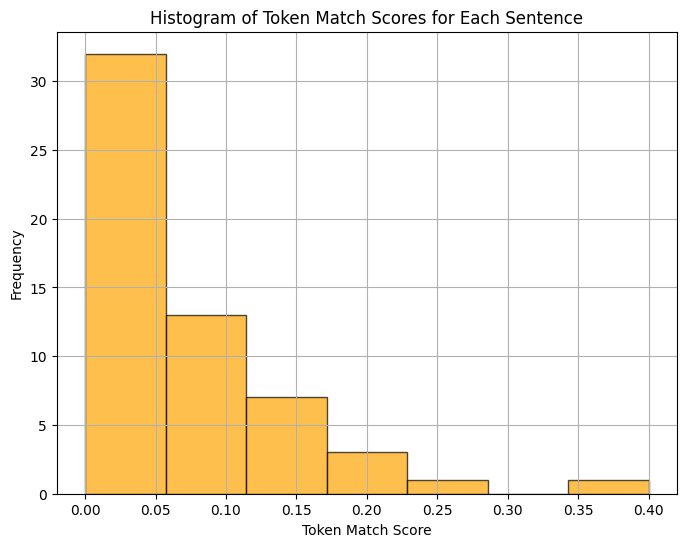

In [54]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load the HTML content from the pickle file
file_name = "article.pkl"
with open(file_name, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()  # Extract the full article text

# Define the scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculates the ratio of matching tokens in the sentence compared to all tokens.
    
    Args:
        sentence (str): The input sentence to evaluate.
        interesting_tokens (list): A list of "interesting" tokens to look for.
    
    Returns:
        float: The ratio of matching tokens to total tokens (between 0 and 1).
    """
    # Process the sentence with spaCy
    doc = nlp(sentence)
    # Count the number of matching tokens (case-insensitive)
    match_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    # Calculate the ratio
    ratio = match_count / len(doc) if len(doc) else 0
    return ratio


# Process the article through the spaCy pipeline
doc = nlp(article_text)

# Filter tokens: exclude punctuation, stopwords, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of each token
token_freq = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = [token for token, freq in token_freq.most_common(5)]

# List to store scores for each sentence
scores = []

# Iterate through sentences in the article and calculate their token match ratio
for sentence in doc.sents:
    score = score_sentence_by_token(sentence.text, most_common_tokens)
    scores.append(score)

# Plot the histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=7, color = 'Orange', edgecolor='black', alpha=0.7)
plt.title("Histogram of Token Match Scores for Each Sentence")
plt.xlabel("Token Match Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Comment: From the histogram, the most common range of scores appears to be between 0.0 and 0.05.

Question 7: Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

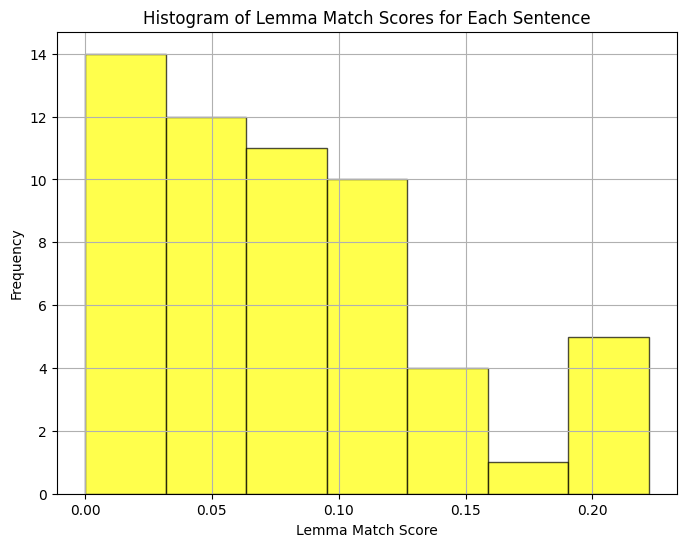

In [58]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load the HTML content from the pickle file
file_name = "article.pkl"
with open(file_name, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()  # Extract the full article text

# Define the scoring function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculates the ratio of matching lemmas in the sentence compared to all tokens' lemmas.
    
    Args:
        sentence (str): The input sentence to evaluate.
        interesting_lemmas (list): A list of "interesting" lemmas to look for.
    
    Returns:
        float: The ratio of matching lemmas to total tokens (between 0 and 1).
    """
    # Process the sentence with spaCy
    doc = nlp(sentence)
    # Count the number of matching lemmas (case-insensitive)
    match_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    # Calculate the ratio
    ratio = match_count / len(doc) if len(doc) else 0
    return ratio


# Process the article through the spaCy pipeline
doc = nlp(article_text)

# Filter tokens: exclude punctuation, stopwords, and whitespace
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most common lemmas (adjust as needed)
most_common_lemmas = [lemma for lemma, freq in lemma_freq.most_common(5)]

# List to store scores for each sentence
lemma_scores = []

# Iterate through sentences in the article and calculate their lemma match ratio
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence.text, most_common_lemmas)
    lemma_scores.append(score)


# Plot the histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(lemma_scores, bins=7, color= 'yellow', edgecolor='black', alpha=0.7)
plt.title("Histogram of Lemma Match Scores for Each Sentence")
plt.xlabel("Lemma Match Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Comment: From the histogram, the most common range of scores falls between 0.00 and 0.05. 

Question 8: Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Only nouns (and proper nouns) would remain in the lists generated in questions 3 and 4 if we modified the code to filter for nouns. This means words like car, headlight, technology, laser, and their lemmas (e.g., headlight, technology, laser) would be included.
Other words such as verbs, adjectives, adverbs, pronouns, prepositions, stopwords, punctuation, and whitespace would be omitted.

In [61]:
# Filter out tokens that are not nouns
nouns = [token.text for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of nouns
noun_counts = Counter(nouns)

# Determine 5 most frequent noun tokens
most_frequent_nouns = noun_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Noun Tokens:")
for noun, freq in most_frequent_nouns:
    print(f"Noun: {noun}, Frequency: {freq}")

Top 5 Most Frequent Noun Tokens:
Noun: laser, Frequency: 29
Noun: headlights, Frequency: 17
Noun: technology, Frequency: 10
Noun: headlight, Frequency: 9
Noun: beam, Frequency: 7


In [64]:
# Filter out lemmas that are not nouns
lemmas = [token.lemma_ for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of nouns
lemma_counts = Counter(lemmas)

# Determine 5 most frequent noun lemmas
most_frequent_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Noun Lemmas:")
for lemma, freq in most_frequent_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Noun Lemmas:
Lemma: laser, Frequency: 34
Lemma: headlight, Frequency: 26
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 8
